In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
from tqdm import tqdm
from datetime import datetime
import json
import ast
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings("ignore")


from sklearn import linear_model
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.metrics import mean_squared_error,r2_score
# from import lightgbm
from sklearn.neighbors import KNeighborsRegressor
import tensorflow as tf
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense

Using TensorFlow backend.


## read train and test datasets, change the json-like columns to list

In [2]:
train= pd.read_csv('train.csv')
test= pd.read_csv('test.csv')

#manually correct some of the budget values in both train and test

train.loc[train['id'] == 16,'revenue'] = 192864          # Skinning
train.loc[train['id'] == 90,'budget'] = 30000000         # Sommersby          
train.loc[train['id'] == 118,'budget'] = 60000000        # Wild Hogs
train.loc[train['id'] == 149,'budget'] = 18000000        # Beethoven
train.loc[train['id'] == 313,'revenue'] = 12000000       # The Cookout 
train.loc[train['id'] == 451,'revenue'] = 12000000       # Chasing Liberty
train.loc[train['id'] == 464,'budget'] = 20000000        # Parenthood
train.loc[train['id'] == 470,'budget'] = 13000000        # The Karate Kid, Part II
train.loc[train['id'] == 513,'budget'] = 930000          # From Prada to Nada
train.loc[train['id'] == 797,'budget'] = 8000000         # Welcome to Dongmakgol
train.loc[train['id'] == 819,'budget'] = 90000000        # Alvin and the Chipmunks: The Road Chip
train.loc[train['id'] == 850,'budget'] = 90000000        # Modern Times
train.loc[train['id'] == 1007,'budget'] = 2              # Zyzzyx Road 
train.loc[train['id'] == 1112,'budget'] = 7500000        # An Officer and a Gentleman
train.loc[train['id'] == 1131,'budget'] = 4300000        # Smokey and the Bandit   
train.loc[train['id'] == 1359,'budget'] = 10000000       # Stir Crazy 
train.loc[train['id'] == 1542,'budget'] = 1              # All at Once
train.loc[train['id'] == 1570,'budget'] = 15800000       # Crocodile Dundee II
train.loc[train['id'] == 1571,'budget'] = 4000000        # Lady and the Tramp
train.loc[train['id'] == 1714,'budget'] = 46000000       # The Recruit
train.loc[train['id'] == 1721,'budget'] = 17500000       # Cocoon
train.loc[train['id'] == 1865,'revenue'] = 25000000      # Scooby-Doo 2: Monsters Unleashed
train.loc[train['id'] == 1885,'budget'] = 12             # In the Cut
train.loc[train['id'] == 2091,'budget'] = 10             # Deadfall
train.loc[train['id'] == 2268,'budget'] = 17500000       # Madea Goes to Jail budget
train.loc[train['id'] == 2491,'budget'] = 6              # Never Talk to Strangers
train.loc[train['id'] == 2602,'budget'] = 31000000       # Mr. Holland's Opus
train.loc[train['id'] == 2612,'budget'] = 15000000       # Field of Dreams
train.loc[train['id'] == 2696,'budget'] = 10000000       # Nurse 3-D
train.loc[train['id'] == 2801,'budget'] = 10000000       # Fracture
train.loc[train['id'] == 335,'budget'] = 2 
train.loc[train['id'] == 348,'budget'] = 12
train.loc[train['id'] == 470,'budget'] = 13000000 
train.loc[train['id'] == 513,'budget'] = 1100000
train.loc[train['id'] == 640,'budget'] = 6 
train.loc[train['id'] == 696,'budget'] = 1
train.loc[train['id'] == 797,'budget'] = 8000000 
train.loc[train['id'] == 850,'budget'] = 1500000
train.loc[train['id'] == 1199,'budget'] = 5 
train.loc[train['id'] == 1282,'budget'] = 9               # Death at a Funeral
train.loc[train['id'] == 1347,'budget'] = 1
train.loc[train['id'] == 1755,'budget'] = 2
train.loc[train['id'] == 1801,'budget'] = 5
train.loc[train['id'] == 1918,'budget'] = 592 
train.loc[train['id'] == 2033,'budget'] = 4
train.loc[train['id'] == 2118,'budget'] = 344 
train.loc[train['id'] == 2252,'budget'] = 130
train.loc[train['id'] == 2256,'budget'] = 1 
train.loc[train['id'] == 2696,'budget'] = 10000000

#=====================================================================

#Clean Data test
test.loc[test['id'] == 6733,'budget'] = 5000000
test.loc[test['id'] == 3889,'budget'] = 15000000
test.loc[test['id'] == 6683,'budget'] = 50000000
test.loc[test['id'] == 5704,'budget'] = 4300000
test.loc[test['id'] == 6109,'budget'] = 281756
test.loc[test['id'] == 7242,'budget'] = 10000000
test.loc[test['id'] == 7021,'budget'] = 17540562       #  Two Is a Family
test.loc[test['id'] == 5591,'budget'] = 4000000        # The Orphanage
test.loc[test['id'] == 4282,'budget'] = 20000000       # Big Top Pee-wee
test.loc[test['id'] == 3033,'budget'] = 250 
test.loc[test['id'] == 3051,'budget'] = 50
test.loc[test['id'] == 3084,'budget'] = 337
test.loc[test['id'] == 3224,'budget'] = 4  
test.loc[test['id'] == 3594,'budget'] = 25  
test.loc[test['id'] == 3619,'budget'] = 500  
test.loc[test['id'] == 3831,'budget'] = 3  
test.loc[test['id'] == 3935,'budget'] = 500  
test.loc[test['id'] == 4049,'budget'] = 995946 
test.loc[test['id'] == 4424,'budget'] = 3  
test.loc[test['id'] == 4460,'budget'] = 8  
test.loc[test['id'] == 4555,'budget'] = 1200000 
test.loc[test['id'] == 4624,'budget'] = 30 
test.loc[test['id'] == 4645,'budget'] = 500 
test.loc[test['id'] == 4709,'budget'] = 450 
test.loc[test['id'] == 4839,'budget'] = 7
test.loc[test['id'] == 3125,'budget'] = 25 
test.loc[test['id'] == 3142,'budget'] = 1
test.loc[test['id'] == 3201,'budget'] = 450
test.loc[test['id'] == 3222,'budget'] = 6
test.loc[test['id'] == 3545,'budget'] = 38
test.loc[test['id'] == 3670,'budget'] = 18
test.loc[test['id'] == 3792,'budget'] = 19
test.loc[test['id'] == 3881,'budget'] = 7
test.loc[test['id'] == 3969,'budget'] = 400
test.loc[test['id'] == 4196,'budget'] = 6
test.loc[test['id'] == 4221,'budget'] = 11
test.loc[test['id'] == 4222,'budget'] = 500
test.loc[test['id'] == 4285,'budget'] = 11
test.loc[test['id'] == 4319,'budget'] = 1
test.loc[test['id'] == 4639,'budget'] = 10
test.loc[test['id'] == 4719,'budget'] = 45
test.loc[test['id'] == 4822,'budget'] = 22
test.loc[test['id'] == 4829,'budget'] = 20
test.loc[test['id'] == 4969,'budget'] = 20
test.loc[test['id'] == 5021,'budget'] = 40 
test.loc[test['id'] == 5035,'budget'] = 1 
test.loc[test['id'] == 5063,'budget'] = 14 
test.loc[test['id'] == 5119,'budget'] = 2 
test.loc[test['id'] == 5214,'budget'] = 30 
test.loc[test['id'] == 5221,'budget'] = 50 
test.loc[test['id'] == 4903,'budget'] = 15
test.loc[test['id'] == 4983,'budget'] = 3
test.loc[test['id'] == 5102,'budget'] = 28
test.loc[test['id'] == 5217,'budget'] = 75
test.loc[test['id'] == 5224,'budget'] = 3 
test.loc[test['id'] == 5469,'budget'] = 20 
test.loc[test['id'] == 5840,'budget'] = 1 
test.loc[test['id'] == 5960,'budget'] = 30
test.loc[test['id'] == 6506,'budget'] = 11 
test.loc[test['id'] == 6553,'budget'] = 280
test.loc[test['id'] == 6561,'budget'] = 7
test.loc[test['id'] == 6582,'budget'] = 218
test.loc[test['id'] == 6638,'budget'] = 5
test.loc[test['id'] == 6749,'budget'] = 8 
test.loc[test['id'] == 6759,'budget'] = 50 
test.loc[test['id'] == 6856,'budget'] = 10
test.loc[test['id'] == 6858,'budget'] =  100
test.loc[test['id'] == 6876,'budget'] =  250
test.loc[test['id'] == 6972,'budget'] = 1
test.loc[test['id'] == 7079,'budget'] = 8000000
test.loc[test['id'] == 7150,'budget'] = 118
test.loc[test['id'] == 6506,'budget'] = 118
test.loc[test['id'] == 7225,'budget'] = 6
test.loc[test['id'] == 7231,'budget'] = 85
test.loc[test['id'] == 5222,'budget'] = 5
test.loc[test['id'] == 5322,'budget'] = 90
test.loc[test['id'] == 5350,'budget'] = 70
test.loc[test['id'] == 5378,'budget'] = 10
test.loc[test['id'] == 5545,'budget'] = 80
test.loc[test['id'] == 5810,'budget'] = 8
test.loc[test['id'] == 5926,'budget'] = 300
test.loc[test['id'] == 5927,'budget'] = 4
test.loc[test['id'] == 5986,'budget'] = 1
test.loc[test['id'] == 6053,'budget'] = 20
test.loc[test['id'] == 6104,'budget'] = 1
test.loc[test['id'] == 6130,'budget'] = 30
test.loc[test['id'] == 6301,'budget'] = 150
test.loc[test['id'] == 6276,'budget'] = 100
test.loc[test['id'] == 6473,'budget'] = 100
test.loc[test['id'] == 6842,'budget'] = 30


test['revenue'] = np.nan

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
id                       3000 non-null int64
belongs_to_collection    604 non-null object
budget                   3000 non-null int64
genres                   2993 non-null object
homepage                 946 non-null object
imdb_id                  3000 non-null object
original_language        3000 non-null object
original_title           3000 non-null object
overview                 2992 non-null object
popularity               3000 non-null float64
poster_path              2999 non-null object
production_companies     2844 non-null object
production_countries     2945 non-null object
release_date             3000 non-null object
runtime                  2998 non-null float64
spoken_languages         2980 non-null object
status                   3000 non-null object
tagline                  2403 non-null object
title                    3000 non-null object
Keywords             

In [3]:
def str_to_list(x):
    try:
        return ast.literal_eval(x)
    except:
        return {}

In [4]:
# add total votes and rating to both train and test 
# features from https://www.kaggle.com/kamalchhirang/eda-simple-feature-engineering-external-data

TrainAdditionalFeatures=pd.read_csv('tmdb-competition-additional-features/TrainAdditionalFeatures.csv')
TestAdditionalFeatures=pd.read_csv('tmdb-competition-additional-features/TestAdditionalFeatures.csv')
train = pd.merge(train, TrainAdditionalFeatures, how='left', on=['imdb_id'])
test = pd.merge(test,TestAdditionalFeatures, how='left', on=['imdb_id'])


In [5]:
# add additional data to train
# features from https://www.kaggle.com/kamalchhirang/eda-simple-feature-engineering-external-data

additionalTrainData = pd.read_csv('tmdb-box-office-prediction-more-training-data/additionalTrainData.csv')
additionalTrainData['release_date'] = additionalTrainData['release_date'].astype('str')
additionalTrainData['release_date'] = additionalTrainData['release_date'].str.replace('-', '/')
train = pd.concat([train, additionalTrainData],ignore_index=True)


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 26 columns):
Keywords                 2724 non-null object
belongs_to_collection    604 non-null object
budget                   5001 non-null int64
cast                     2987 non-null object
crew                     2984 non-null object
genres                   2993 non-null object
homepage                 946 non-null object
id                       3000 non-null float64
imdb_id                  4870 non-null object
original_language        5001 non-null object
original_title           5001 non-null object
overview                 4886 non-null object
popularity               5001 non-null float64
popularity2              2882 non-null float64
poster_path              2999 non-null object
production_companies     2844 non-null object
production_countries     2945 non-null object
rating                   4883 non-null float64
release_date             5001 non-null object
revenue           

In [7]:
#--------------------------------------------------------------------------------------
#convert type of categorical columns from str to list using str_to_list function
columns_to_convert=['genres','production_companies','production_countries',
                    'belongs_to_collection','spoken_languages',
                     'Keywords', 'cast', 'crew']
# convert all the columns with json format, and pass on empty rows 
for column in columns_to_convert:
    try:
        train[column]=train[column].apply(str_to_list)
        test[column]=test[column].apply(str_to_list)
    except:
        {}

In [8]:
# create a dictionary for the json-like columns to store all the names and their frequency of occurance
json_columns=['genres','production_companies','production_countries',
        'spoken_languages','Keywords', 'cast', 'crew']

def get_names_frequency (df):
    global json_columns
    df_dict=dict()
    
    for column in json_columns:
        column_dict=dict()
        
        for row in df[column]:
            if row != {}:
                for item in row:
                    if item['name'] in column_dict.keys():
                        column_dict[item['name']] += 1
                    else:
                        column_dict[item['name']] = 1   

        df_dict[column]=column_dict
    return df_dict   
        
train_names=get_names_frequency(train)   
test_names=get_names_frequency(test)

# train_names and test_names are both dictionaries of dictionaries.
# for each column of train and test, keep the names that exist in both datasets
# delete names with frequency <10 in the train_names
# print(len(train_names['production_companies']))

for column in json_columns:
    remove_names=[]
    train_names_keys=set(list(train_names[column].keys())) # returns a dict
    test_names_keys=set(list(test_names[column].keys()))
    
    names_to_remove=list(train_names_keys-test_names_keys)+list(test_names_keys-train_names_keys)

    for name in names_to_remove:
        if name in train_names[column]:
            del train_names[column][name]
        if name in test_names[column]:
            del test_names[column][name] 

    for name in train_names_keys:
        if name not in names_to_remove:
            if train_names[column][name] < 10:
                del train_names[column][name]           


In [9]:
combined_df=pd.concat([train, test])
combined_df.to_csv('combined_df.csv',index = False, header = True)

In [10]:
def prepare(df):
    global train_names
    # craete 4 columns for year , quarter, month, and dayof week using release date
    df[['release_month','release_day','release_year']]=df['release_date'].\
    str.split('/',expand=True).replace(np.nan, -1).astype(int)
    df['release_year']=df['release_year'].apply(lambda x: x+2000 if x<19 else x+1900)
    df['release_dayofweek']=pd.to_datetime(df['release_date']).dt.dayofweek
    df['release_quarter']=pd.to_datetime(df['release_date']).dt.quarter

    # # calculate mean revenue by year, quarter, month, and dayofweek
    # for column in ['release_year','release_quarter','release_month','release_dayofweek']:
    #     temp_list=df.groupby(column)['revenue'].mean()
    #     df['mean_revenue_by_'+column]=df[column].apply(lambda x: temp_list[x])

    # # calculate mean budget by year, quarter, month, and dayofweek
    # for column in ['release_year','release_quarter','release_month','release_dayofweek']:
    #     temp_list=df.groupby(column)['budget'].mean()
    #     df['mean_budget_by_'+ column]=df[column].apply(lambda x: temp_list[x])

    # #calculate mean runtime , popularity by year
    # for i in ['runtime','popularity']:
    #     for column in ['release_year']:
    #         temp_list=df.groupby(column)[i].mean()
    #         df['mean_'+i+'_by_'+ column]=df[column].apply(lambda x: temp_list[x])

    #==============
    #runtime
    df['meanruntimeByYear'] = df.groupby("release_year")["runtime"].transform('mean')

    # total votes
    df['meantotalVotesByYear'] = df.groupby("release_year")["totalVotes"].transform('mean')
    df['meanTotalVotesByRating'] = df.groupby("rating")["totalVotes"].transform('mean')
    
    #popularity
    df['meanPopularityByYear'] = df.groupby("release_year")["popularity"].transform('mean')
    df['_popularity_mean_year'] = df['popularity'] / df.groupby("release_year")["popularity"].transform('mean')


    #budget: original budget vs inflation budget
    df['originalBudget'] = df['budget']
    df['meanBudgetByYear'] = df.groupby("release_year")['originalBudget'].transform('mean')
    df['medianBudgetByYear'] = df.groupby("release_year")['originalBudget'].transform('median')
    
    df['inflationBudget'] = df['originalBudget'] + df['originalBudget']*1.8/100*(2018-df['release_year']) #Inflation simple formula
    df['budget'] = np.log1p(df['budget'])  #log(1+x)
  
    #ratios
    df['_budget_runtime_ratio'] = df['budget']/df['runtime'] 
    df['_budget_popularity_ratio'] = df['budget']/df['popularity']
    df['_budget_year_ratio'] = df['budget']/(df['release_year'])

    df['_releaseYear_popularity_ratio'] = df['release_year']/df['popularity']
    df['_releaseYear_popularity_ratio2'] = df['popularity']/df['release_year']

    df['_popularity_totalVotes_ratio'] = df['totalVotes']/df['popularity']
    df['_rating_popularity_ratio'] = df['rating']/df['popularity']
    df['_rating_totalVotes_ratio'] = df['totalVotes']/df['rating']
    df['_totalVotes_releaseYear_ratio'] = df['totalVotes']/df['release_year']
    df['_budget_rating_ratio'] = df['budget']/df['rating']
    df['_runtime_rating_ratio'] = df['runtime']/df['rating']
    df['_budget_totalVotes_ratio'] = df['budget']/df['totalVotes']
    #=================
    
    df['has_homepage'] = 1
    df.loc[pd.isnull(df['homepage']) ,"has_homepage"] = 0  

    df['isbelongs_to_collectionNA'] = 0
    df.loc[pd.isnull(df['belongs_to_collection']) ,"isbelongs_to_collectionNA"] = 1

    df['isTaglineNA'] = 0
    df.loc[df['tagline'] == 0 ,"isTaglineNA"] = 1 

    df['isOriginalLanguageEng'] = 0 
    df.loc[ df['original_language'] == "en" ,"isOriginalLanguageEng"] = 1

    df['isTitleDifferent'] = 1
    df.loc[ df['original_title'] == df['title'] ,"isTitleDifferent"] = 0 

    df['isMovieReleased'] = 1
    df.loc[ df['status'] != "Released" ,"isMovieReleased"] = 0 
    
    #=================  
    df['original_title_letter_count'] = df['original_title'].str.len() 
    df['original_title_word_count'] = df['original_title'].str.split().str.len() 
    df['title_word_count'] = df['title'].str.split().str.len()
    df['overview_word_count'] = df['overview'].str.split().str.len()
    df['tagline_word_count'] = df['tagline'].str.split().str.len()
    
    df['_num_Keywords'] = df['Keywords'].apply(lambda x: len(x) if x != {} else 0)
    df['_num_production_companies'] = df['production_companies'].apply(lambda x: len(x) if x != {} else 0) 
    df['_num_cast'] = df['cast'].apply(lambda x: len(x) if x != {} else 0) 
    df['_num_crew'] = df['crew'].apply(lambda x: len(x) if x != {} else 0) 

    #=================   
    #number of genders in cast and crew
    def count_by_key_value(row,key,value):
        c=0
        try:
            for dic in row:
                if dic[key] == value:
                    c+= 1
        except: 
            pass   
        return c
    
    for i in [0,1,2]:
        df['_num_'+str(i)+'_gender_cast']=df['cast'].apply(lambda x: count_by_key_value(x,'gender',i) )    
        df['_num_'+str(i)+'_gender_crew']=df['crew'].apply(lambda x: count_by_key_value(x,'gender',i) )

    #=================     
    
    df['_collection_name'] = df['belongs_to_collection'].apply(lambda x: x[0]['name'] if x != {} else 0)
    le = LabelEncoder()
    le.fit(list(df['_collection_name'].fillna('')))
    df['_collection_name'] = le.transform(df['_collection_name'].fillna('').astype(str))
    

    # get collection id   ===========================
    df['collection_id'] = df['belongs_to_collection'].\
                        apply(lambda x : np.nan if len(x)==0 else x[0]['id'])


    
    for col in ['genres', 'production_countries', 'spoken_languages', 'production_companies'] :
        df[col] = df[col].map(lambda x: sorted(list(set([n if n in train_names[col] else col+'_etc' for n in [d['name'] for d in x]])))).map(lambda x: ','.join(map(str, x)))
        temp = df[col].str.get_dummies(sep=',')
        df = pd.concat([df, temp], axis=1, sort=False)
    df.drop(['genres_etc'], axis = 1, inplace = True)

    df = df.drop(['id', 'revenue','belongs_to_collection','genres','homepage','imdb_id','overview','runtime'
        ,'poster_path','production_companies','production_countries','release_date','spoken_languages'
        ,'status','title','Keywords','cast','crew','original_language','original_title','tagline', 'collection_id'
        ],axis=1)

    df.fillna(value=0.0, inplace = True) 

    return df

    

In [11]:
all_data = prepare(combined_df.reset_index(drop = True))

In [12]:
all_data2=all_data.copy()
all_data2=all_data2.drop(columns=['_budget_totalVotes_ratio','_budget_rating_ratio',
                       '_budget_runtime_ratio','_rating_totalVotes_ratio',
                       '_runtime_rating_ratio','originalBudget'])

train2 = all_data2.loc[:train.shape[0] - 1,:]
test2 = all_data2.loc[train.shape[0]:,:]
y=np.power(train['revenue'].values,1/6)

## Random forest

In [13]:
X_train, X_test,y_train, y_test = train_test_split(train2,y,test_size = 0.33,random_state=12)

#n_leaves = [1,10,50,100,200,500,1000,1500]
n_leaves = [1,5,10,20,30,50,100,200,500,1000,1500]
n_trees = [10,100,500,1000,2000]

in_sample_score = np.array(np.zeros( ( len(n_trees),len(n_leaves)) ))
test_score = np.array(np.zeros( (len(n_trees),len(n_leaves)) ))

np.shape(X_train)[1]*0.5

99.0

In [14]:
for idx,trees in enumerate(n_trees):
    for jdx,n in enumerate(n_leaves):
        model=RandomForestRegressor(n_estimators=trees,
                                   min_samples_leaf =n,
                                   max_features=100)
        model.fit(X_train,y_train)

        print('Train Set',str(model).split("(")[0],model.score(X_train,y_train))
        print('Test Set',str(model).split("(")[0],model.score(X_test,y_test))
        
        in_sample_score[idx,jdx] = model.score(X_train,y_train)
        test_score[idx,jdx] = model.score(X_test,y_test)

Train Set RandomForestRegressor 0.9465295257819915
Test Set RandomForestRegressor 0.7039417681403868
Train Set RandomForestRegressor 0.8760892579168249
Test Set RandomForestRegressor 0.7137396306920332
Train Set RandomForestRegressor 0.8243550547309939
Test Set RandomForestRegressor 0.7221747993890324
Train Set RandomForestRegressor 0.7764967211786814
Test Set RandomForestRegressor 0.7127725608793543
Train Set RandomForestRegressor 0.7564758190526837
Test Set RandomForestRegressor 0.7150477208986854
Train Set RandomForestRegressor 0.7325279494086441
Test Set RandomForestRegressor 0.708307634967626
Train Set RandomForestRegressor 0.7004256004429406
Test Set RandomForestRegressor 0.6876577883516706
Train Set RandomForestRegressor 0.6528318404776421
Test Set RandomForestRegressor 0.6443636677908813
Train Set RandomForestRegressor 0.5585916315800674
Test Set RandomForestRegressor 0.5449243018044438
Train Set RandomForestRegressor 0.4424930060318877
Test Set RandomForestRegressor 0.45444347

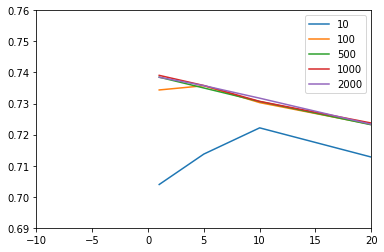

In [15]:
# %matplotlib 
for i in range(len(n_trees)):
    
    plt.plot(n_leaves,test_score[i,:],label=str(n_trees[i]))
plt.ylim(.69,.76) 
plt.xlim(-10,20)
plt.legend()
plt.show()

#best results were: 
 #   max_features = n_features
 #   min_samples_leaf = 5
 #   num_trees = 1000
    

In [16]:
#best results were: 
 #   max_features = n_features
 #   min_samples_leaf = 5
 #   num_trees = 1000 
X_train, X_test,y_train, y_test = train_test_split(train2,y,test_size = 0.33,random_state=12)

model=RandomForestRegressor(n_estimators=1000,min_samples_leaf =5,max_features=100)
model.fit(X_train,y_train)

print('Train Set',str(model).split("(")[0],model.score(X_train,y_train))
print('Test Set',str(model).split("(")[0],model.score(X_test,y_test))

Train Set RandomForestRegressor 0.8906338360112122
Test Set RandomForestRegressor 0.7355721941827451


In [17]:
# train rnf model with the chosen parameters using all train data before submission
model=RandomForestRegressor(n_estimators=1000,min_samples_leaf =5,max_features=100)
model.fit(train2,y)
std = np.std([model.feature_importances_ for tree in model.estimators_],axis=0)
rnf_importance_df=pd.DataFrame({'features':train2.columns,
                                'importances':model.feature_importances_,
                                'std':std})
rnf_importance_df=rnf_importance_df.sort_values(by='importances',ascending=False)

In [ ]:
# test['revenue'] = model.predict(test2)
# test['revenue']=test['revenue'].apply(lambda x: np.power(x,6))
# test[['id','revenue']].to_csv('test_submission.csv',index = False, header = True)
# !kaggle competitions submit -f 'test_submission.csv' -m 'rnf-all' tmdb-box-office-prediction
# test=test.drop(columns=['revenue'])

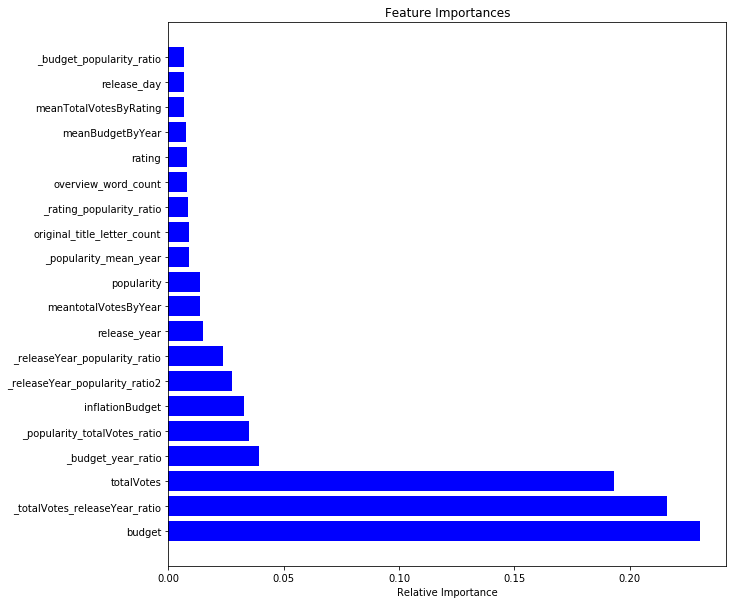

In [20]:
# plot feature importances and select top features for training neural network 
%matplotlib inline
plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(20), rnf_importance_df['importances'][:20],
         yerr=rnf_importance_df['std'][:20],
         color='b', align='center')
plt.yticks(range(20), rnf_importance_df['features'][:20])
plt.xlabel('Relative Importance')
plt.show()

## Neural Network

In [18]:
columns_to_scale=[]
for column in all_data2.columns:
    if all_data2[column].max() >1:
          columns_to_scale.append(column)
print(columns_to_scale)            

['budget', 'popularity', 'popularity2', 'rating', 'totalVotes', 'release_month', 'release_day', 'release_year', 'release_dayofweek', 'release_quarter', 'meanruntimeByYear', 'meantotalVotesByYear', 'meanTotalVotesByRating', 'meanPopularityByYear', '_popularity_mean_year', 'meanBudgetByYear', 'medianBudgetByYear', 'inflationBudget', '_budget_popularity_ratio', '_releaseYear_popularity_ratio', '_popularity_totalVotes_ratio', '_rating_popularity_ratio', '_totalVotes_releaseYear_ratio', 'original_title_letter_count', 'original_title_word_count', 'title_word_count', 'overview_word_count', 'tagline_word_count', '_num_Keywords', '_num_production_companies', '_num_cast', '_num_crew', '_num_0_gender_cast', '_num_0_gender_crew', '_num_1_gender_cast', '_num_1_gender_crew', '_num_2_gender_cast', '_num_2_gender_crew', '_collection_name']


In [19]:
for column in columns_to_scale: 
    try:
        scaler = MinMaxScaler()
        fitted = scaler.fit(all_data2[column].values.reshape(-1,1))
        all_data2[column] = fitted.transform(all_data2[column].values.reshape(-1,1))
    except:
        print(column)

In [20]:
train2_nn = all_data2.loc[:train.shape[0] - 1,rnf_importance_df['features'][:10]]
test2_nn = all_data2.loc[train.shape[0]:,rnf_importance_df['features'][:10]]

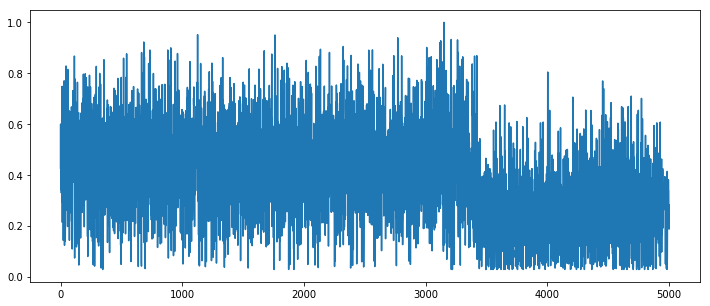

In [21]:
from sklearn.preprocessing import MaxAbsScaler
plt.figure(figsize=(12,5))
y_scaler=MaxAbsScaler().fit(y.reshape(-1,1))
y_scaled=y_scaler.transform(y.reshape(-1,1))
# plt.plot(train['revenue'])
# plt.plot(y.reshape(-1,1))
plt.plot(y_scaled)

In [22]:
X_train, X_test,y_train, y_test = train_test_split(train2_nn,y_scaled,test_size = 0.3,random_state=46)
nn_model = Sequential()
nn_model.add(Dense(units = 5, activation = 'relu',input_dim =(train2_nn.shape)[1]))
nn_model.add(Dense(units = 5, activation = 'relu'))
nn_model.add(Dense(units = 1, activation = 'linear'))
nn_model.compile(loss = 'mean_squared_error',optimizer = 'adam',metrics = ['mean_squared_error'])
nn_model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


In [23]:
# nn_model.fit(X_train,y_train,epochs = 400,shuffle = True)
nn_model.fit(train2_nn,y_scaled,epochs = 400,shuffle = True)

Instructions for updating:
Use tf.cast instead.
Epoch 1/400
5001/5001 [==============================] - 0s 88us/step - loss: 0.0228 - mean_squared_error: 0.0228
Epoch 2/400
5001/5001 [==============================] - 0s 46us/step - loss: 0.0197 - mean_squared_error: 0.0197
Epoch 3/400
5001/5001 [==============================] - 0s 47us/step - loss: 0.0185 - mean_squared_error: 0.0185
Epoch 4/400
5001/5001 [==============================] - 0s 49us/step - loss: 0.0177 - mean_squared_error: 0.0177
Epoch 5/400
5001/5001 [==============================] - 0s 42us/step - loss: 0.0171 - mean_squared_error: 0.0171
Epoch 6/400
5001/5001 [==============================] - 0s 54us/step - loss: 0.0168 - mean_squared_error: 0.0168
Epoch 7/400
5001/5001 [==============================] - 0s 52us/step - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 8/400
5001/5001 [==============================] - 0s 40us/step - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 9/400
5001/5001 [=================

5001/5001 [==============================] - 0s 40us/step - loss: 0.0125 - mean_squared_error: 0.0125
Epoch 71/400
5001/5001 [==============================] - 0s 37us/step - loss: 0.0126 - mean_squared_error: 0.0126
Epoch 72/400
5001/5001 [==============================] - 0s 36us/step - loss: 0.0125 - mean_squared_error: 0.0125
Epoch 73/400
5001/5001 [==============================] - 0s 37us/step - loss: 0.0125 - mean_squared_error: 0.0125
Epoch 74/400
5001/5001 [==============================] - 0s 38us/step - loss: 0.0125 - mean_squared_error: 0.0125
Epoch 75/400
5001/5001 [==============================] - 0s 41us/step - loss: 0.0124 - mean_squared_error: 0.0124
Epoch 76/400
5001/5001 [==============================] - 0s 43us/step - loss: 0.0124 - mean_squared_error: 0.0124
Epoch 77/400
5001/5001 [==============================] - 0s 43us/step - loss: 0.0124 - mean_squared_error: 0.0124
Epoch 78/400
5001/5001 [==============================] - 0s 44us/step - loss: 0.0124 - mean_

5001/5001 [==============================] - 0s 55us/step - loss: 0.0119 - mean_squared_error: 0.0119
Epoch 141/400
5001/5001 [==============================] - 0s 57us/step - loss: 0.0120 - mean_squared_error: 0.0120
Epoch 142/400
5001/5001 [==============================] - 0s 49us/step - loss: 0.0119 - mean_squared_error: 0.0119
Epoch 143/400
5001/5001 [==============================] - 0s 43us/step - loss: 0.0119 - mean_squared_error: 0.0119
Epoch 144/400
5001/5001 [==============================] - 0s 41us/step - loss: 0.0120 - mean_squared_error: 0.0120
Epoch 145/400
5001/5001 [==============================] - 0s 38us/step - loss: 0.0119 - mean_squared_error: 0.0119
Epoch 146/400
5001/5001 [==============================] - 0s 44us/step - loss: 0.0119 - mean_squared_error: 0.0119
Epoch 147/400
5001/5001 [==============================] - 0s 46us/step - loss: 0.0119 - mean_squared_error: 0.0119
Epoch 148/400
5001/5001 [==============================] - 0s 60us/step - loss: 0.0119

5001/5001 [==============================] - 0s 46us/step - loss: 0.0117 - mean_squared_error: 0.0117
Epoch 210/400
5001/5001 [==============================] - 0s 42us/step - loss: 0.0117 - mean_squared_error: 0.0117
Epoch 211/400
5001/5001 [==============================] - 0s 39us/step - loss: 0.0118 - mean_squared_error: 0.0118
Epoch 212/400
5001/5001 [==============================] - 0s 41us/step - loss: 0.0117 - mean_squared_error: 0.0117
Epoch 213/400
5001/5001 [==============================] - 0s 38us/step - loss: 0.0117 - mean_squared_error: 0.0117
Epoch 214/400
5001/5001 [==============================] - 0s 36us/step - loss: 0.0117 - mean_squared_error: 0.0117
Epoch 215/400
5001/5001 [==============================] - 0s 39us/step - loss: 0.0117 - mean_squared_error: 0.0117
Epoch 216/400
5001/5001 [==============================] - 0s 43us/step - loss: 0.0117 - mean_squared_error: 0.0117
Epoch 217/400
5001/5001 [==============================] - 0s 42us/step - loss: 0.0117

5001/5001 [==============================] - 0s 40us/step - loss: 0.0115 - mean_squared_error: 0.0115
Epoch 280/400
5001/5001 [==============================] - 0s 39us/step - loss: 0.0115 - mean_squared_error: 0.0115
Epoch 281/400
5001/5001 [==============================] - 0s 39us/step - loss: 0.0115 - mean_squared_error: 0.0115
Epoch 282/400
5001/5001 [==============================] - 0s 38us/step - loss: 0.0116 - mean_squared_error: 0.0116
Epoch 283/400
5001/5001 [==============================] - 0s 41us/step - loss: 0.0115 - mean_squared_error: 0.0115
Epoch 284/400
5001/5001 [==============================] - 0s 40us/step - loss: 0.0115 - mean_squared_error: 0.0115
Epoch 285/400
5001/5001 [==============================] - 0s 41us/step - loss: 0.0115 - mean_squared_error: 0.0115
Epoch 286/400
5001/5001 [==============================] - 0s 41us/step - loss: 0.0115 - mean_squared_error: 0.0115
Epoch 287/400
5001/5001 [==============================] - 0s 39us/step - loss: 0.0115

5001/5001 [==============================] - 0s 47us/step - loss: 0.0113 - mean_squared_error: 0.0113
Epoch 350/400
5001/5001 [==============================] - 0s 45us/step - loss: 0.0114 - mean_squared_error: 0.0114
Epoch 351/400
5001/5001 [==============================] - 0s 47us/step - loss: 0.0114 - mean_squared_error: 0.0114
Epoch 352/400
5001/5001 [==============================] - 0s 41us/step - loss: 0.0114 - mean_squared_error: 0.0114
Epoch 353/400
5001/5001 [==============================] - 0s 42us/step - loss: 0.0113 - mean_squared_error: 0.0113
Epoch 354/400
5001/5001 [==============================] - 0s 44us/step - loss: 0.0114 - mean_squared_error: 0.0114
Epoch 355/400
5001/5001 [==============================] - 0s 44us/step - loss: 0.0114 - mean_squared_error: 0.0114
Epoch 356/400
5001/5001 [==============================] - ETA: 0s - loss: 0.0114 - mean_squared_error: 0.01 - 0s 40us/step - loss: 0.0113 - mean_squared_error: 0.0113
Epoch 357/400
5001/5001 [=========

In [121]:
nn_model.evaluate(X_test,y_test)

1501/1501 [==============================] - 0s 95us/step


[0.009847986524915949, 0.009847986524915949]

5001
1195 None


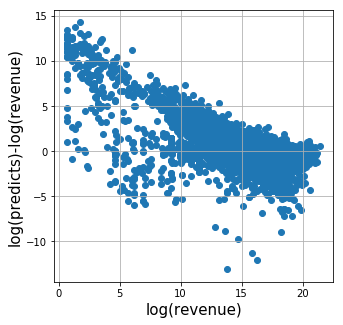

In [30]:
predicts=np.power((y_scaler.inverse_transform(nn_model.predict(train2_nn))).reshape(1,-1),6)
y_true=np.power((y_scaler.inverse_transform(y_scaled)).reshape(1,-1),6)
y_true=train['revenue'].values
plt.figure(figsize=(5,5))   
plt.scatter(np.log1p(y_true),np.log1p(predicts)-np.log1p(y_true))   
plt.grid()
plt.ylabel('log(predicts)-log(revenue)',fontsize=15)
plt.xlabel('log(revenue)',fontsize=15)
# plt.ylim(-10,1000)
diff=(predicts-y_true)/y_true
diff2=[]
for x in diff[0]:
    if x >2:
        diff2.append(x)
        
print(len(diff2),print(len(diff[0])))

In [123]:
test['revenue'] = (y_scaler.inverse_transform(nn_model.predict(test2_nn))).reshape(1,-1)[0]
test['revenue']=test['revenue'].apply(lambda x: np.power(x,6))
test[['id','revenue']].to_csv('test_submission.csv',index = False, header = True)
!kaggle competitions submit -f 'test_submission.csv' -m 'nn' tmdb-box-office-prediction
test=test.drop(columns=['revenue'])

100%|████████████████████████████████████████| 100k/100k [00:01<00:00, 54.3kB/s]
Successfully submitted to TMDB Box Office Prediction

In [89]:
print(test2_nn.shape)

(4398, 20)


In [94]:
print(predict)

[11.148759 13.260846 12.9491   ... 17.427504 22.482304 16.37296 ]


## Junk

In [ ]:
mina={'genre':{"comedy":10,'drama':12,'horor':5,'romance':8},\
      'country':{'usa':30,'Iran':10,'canada':20}}
mj={'genre':{"comedy":10,'action':12,'fiction':5,'romance':8},\
      'country':{'usa':30,'UK':10,'canada':20}}
if 'comedy' in mina['genre']:
    print('yes')

In [ ]:
mina_genre=mina['genre'].keys()
print(sorted(mina_genre))
','.join(map(str, sorted(mina_genre)))
# mj_genre=set(list(mj['genre'].keys()))
# list(mina_genre-mj_genre)+list(mj_genre-mina_genre)

In [ ]:
mina_genre.union(mj_genre)-set(list(mina_genre-mj_genre)+list(mj_genre-mina_genre))

In [ ]:
print(np.nan)

In [ ]:
train['genres']

In [ ]:
    for col in ['genres', 'production_countries', 'spoken_languages', 'production_companies'] :
        df[col] = df[col].map(lambda x: sorted(list(set([n if n in train_dict[col] else col+'_etc' for n in [d['name'] for d in x]])))).map(lambda x: ','.join(map(str, x)))
        temp = df[col].str.get_dummies(sep=',')
        df = pd.concat([df, temp], axis=1, sort=False)
    df.drop(['genres_etc'], axis = 1, inplace = True)
    
for d in x:    
    for n in [d['name'] ]:
        if n in train_dict[col]:
            n
        else:
            col+'_etc'

            
    

In [ ]:
w=np.array([1,2,3,4,5,6,7,8,9,10])
print(w)
print(w.reshape(-1,1))
w_scaler=MaxAbsScaler().fit(w.reshape(-1,1))
w_scaled=w_scaler.transform(w.reshape(-1,1))
w_scaled
w_true=w_scaler.inverse_transform